# Instalación de las librerías

In [83]:
!pip install ultralytics
!pip install -U ipywidgets

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

# Carga de librerías

In [ ]:
import os
import random

from ultralytics import YOLO
import cv2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import yaml

# Descarga dataset

In [ ]:
# Download data from repository and unzip
%cd /content
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Dataset/trafic_data.zip.001 -O trafic_data.zip.001
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Dataset/trafic_data.zip.002 -O trafic_data.zip.002
!7z x -y -sdel trafic_data.zip.001
!rm trafic_data.zip.* -f

# Descarga del modelo

In [ ]:
# Download the model and unzip
%cd /content
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Modelo/yolov8x.zip.001 -O yolov8x.zip.001
!wget https://raw.githubusercontent.com/Laboratorios-2-MIT-MC/IA-Ciber/main/Pr%C3%A1cticas/Proyecto%20Final/Modelo/yolov8x.zip.002 -O yolov8x.zip.002
!7z x -y yolov8x.zip.001
!rm yolov8x.zip.* -f

# Exploración del dataset

In [ ]:
# Path to files and labels
train_images = "/content/trafic_data/train/images"
train_labels = "/content/trafic_data/train/labels"

valid_images = "/content/trafic_data/train/images"
valid_labels = "/content/trafic_data/train/labels"

In [ ]:
def loadLabels(image_file, image_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(image_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plotObjectDetections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

In [ ]:
# List of all the training images
image_files = os.listdir(train_images)

# Choose 12 random image files from the list
random_images = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(3, 4, figsize=(16, 10))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = loadLabels(image_file, train_labels)

    # Plot object detections
    plotObjectDetections(axs[row, col], image, labels)

plt.suptitle("Training")
plt.show()

In [ ]:
# List of all the valid images
image_files = os.listdir(valid_images)

# Choose 12 random image files from the list
random_images = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(3, 4, figsize=(16, 10))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(valid_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = loadLabels(image_file, valid_labels)

    # Plot object detections
    plotObjectDetections(axs[row, col], image, labels)

plt.suptitle("Valid")
plt.show()

In [ ]:
# Class names found on the Dataset
with open('/content/trafic_data/data_1.yaml', 'r') as f:
    data_yaml = yaml.load(f, Loader=yaml.FullLoader)

data_yaml["names"]

# Comprobación del rendimiento del modelo

In [ ]:
# Carga de modelo y entrenamiento
%cd /content
model = YOLO('yolov8x.pt')

# model = YOLO()

model.train(data = '/content/trafic_data/data_1.yaml',
            device = '0',
            epochs = 20,
            seed = 42,
            batch = 8,
            workers = 4)

In [80]:
# Cargamos el modelo preentrenado
%cd /content
model = YOLO("yolov8x.pt")

metrics = model.val(data = '/content/trafic_data/data_1.yaml', device='cuda:0')

# result_predict = model.predict(source = os.path.join(valid_images, random_images[0]), imgsz=(416))

# plot = result_predict[0].plot()
# plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
# display(Image.fromarray(plot))

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


val: Scanning /content/trafic_data/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/trafic_data/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING ⚠️ /content/trafic_data/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:20<00:00,  1.07s/it]


                   all        300       2568    0.00709     0.0629    0.00419    0.00327
            motorcycle        300         32    0.00516      0.906    0.00683    0.00293
              airplane        300        425     0.0833    0.00235     0.0463     0.0417
                   bus        300        842     0.0144     0.0451    0.00757    0.00485
                  boat        300          2          0          0          0          0
         traffic light        300        110          0          0          0          0
          fire hydrant        300        335          0          0          0          0
             stop sign        300        142          0          0          0          0
         parking meter        300          1          0          0          0          0
                 bench        300        192     0.0105     0.0521    0.00632    0.00276
                  bird        300          1          0          0          0          0
                   ca

In [67]:
print(metrics.box.map)    # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)   # a list contains map50-95 of each category

0.0032662107732823035
0.004191577395038353
0.003536167566610374
[  0.0032662   0.0032662   0.0032662   0.0029318    0.041713   0.0048532   0.0032662   0.0032662           0           0           0           0           0   0.0027617           0           0           0           0           0           0           0   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662
   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662
   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.0032662   0.00326

In [81]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2f75c722f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044


image 1/1 /content/trafic_data/train/images/Dipto_-90_jpg.rf.98a7e5c7e977c977b7db496662c33876.jpg: 256x416 1 person, 3 cars, 1 motorcycle, 1 bus, 2 trucks, 33.1ms
Speed: 1.6ms preprocess, 33.1ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)


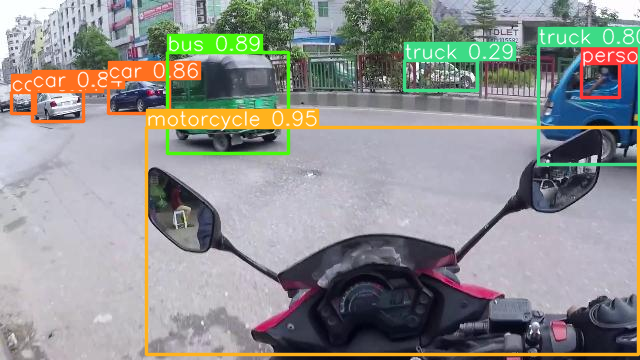

In [78]:
result_predict = model(source = os.path.join(valid_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# result_predict[0]

# Explicación del tipo de ataque

# Preparar el ataque

# Realizamos el ataque

# Análisis de los resultados del ataque

# Aplicaciones en la vida real